In [37]:
# 1. Calcula la razón de compras completadas entre los intentos totales de compra
# 2. Calcula el nivel de fraude *Entiéndase nivel de fraude como la razón de contracargos entre las compras totales.
# 3. ¿Cuáles fueron los días con mayor venta?
# ¿Cuáles fueron los días con más intentos de compra?
# 4. ¿Cuáles son los orígenes más relevantes?
# 5. Calcula la dispersión de score de riesgo


In [38]:
import pandas as pd

In [39]:
##Se carga a través de un archivo en excel con la base de datos a utilizar
df = pd.read_excel("Case study_ Financial analyst_.xlsx",sheet_name="Base de datos")

In [40]:
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333605 entries, 0 to 333604
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                333605 non-null  int64  
 1   payment_status    333605 non-null  object 
 2   device            333605 non-null  object 
 3   created_at        333605 non-null  object 
 4   month             333605 non-null  int64  
 5   amount            333605 non-null  float64
 6   antifraud_score   326378 non-null  float64
 7   antifraud_action  326378 non-null  object 
 8   payment_type      333605 non-null  object 
 9   card_type         304621 non-null  object 
 10  card_brand        304621 non-null  object 
 11  card_bank_name    269787 non-null  object 
 12  transporter       333605 non-null  object 
 13  route             333605 non-null  object 
 14  error_message     110124 non-null  object 
dtypes: float64(2), int64(2), object(11)
memory usage: 38.2+ MB
None


,Id,payment_status,device,created_at,month,amount,antifraud_score,antifraud_action,payment_type,card_type,card_brand,card_bank_name,transporter,route,error_message
0,5339399,charged,web-mobile,2021-03-01T06:00:12.87301Z,3,144.0,23.0,accept,card,debit,visa,BANCOMER,BusMx,Uruapan-Zamora,NaN
1,5339400,failed,web-mobile,2021-03-01T06:00:20.229956Z,3,666.0,27.0,accept,card,unknown,visa,NaN,BusMx,Lagos De Moreno-Monterrey,[3012] Bank authorization is required for this...
2,5339401,failed,web-mobile,2021-03-01T06:01:00.16561Z,3,540.0,32.0,accept,card,debit,mastercard,BMONEX,BusMx,Toluca-Chiapas,[3005] Fraud risk detected by anti-fraud system
3,5339402,charged,web,2021-03-01T06:01:25.087104Z,3,442.4,32.0,accept,card,debit,visa,BANCOMER,BusMx,Ciudad de MÃ©xico-Chiapas,NaN
4,5339403,charged,web,2021-03-01T06:01:26.092279Z,3,216.0,20.0,accept,card,debit,visa,BANCOMER,BusMx,Veracruz-Morelia,NaN


In [41]:
#Al ver que la fila de fechas de compra es de tipo object y en formato UTC, se transforma a formato datetime con el formato ISO8601 para
#detectar variaciones en el formato de las fechas. Se comprueba el nuevo formato de fechas.
df['created_at'] = pd.to_datetime(df['created_at'], format='ISO8601', utc=True)
df["created_at"].info()
#Una vez convertido se crea una nueva columna con los días y los meses (con su nombre) para identificar los datos
df["fecha"] = df["created_at"].dt.date

<class 'pandas.core.series.Series'>
RangeIndex: 333605 entries, 0 to 333604
Series name: created_at
Non-Null Count   Dtype              
--------------   -----              
333605 non-null  datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](1)
memory usage: 2.5 MB


In [42]:
#Al identificarse la columna de las rutas está mal formateada, se corrige para una correcta visualización.
def fix_encoding(text):
    try:
        return text.encode("latin-1").decode("utf-8")
    except:
        return text
    
## Aplicar corrección a la columna
df["route"] = df["route"].apply(fix_encoding)

In [43]:
#Se separa el origin de la ruta, sabiendo que route está en formato origen - destino
df["origin"] = df["route"].str.split("-").str[0]
#Se comprueba la nueva columna
df.head(3)

,Id,payment_status,device,created_at,month,amount,antifraud_score,antifraud_action,payment_type,card_type,card_brand,card_bank_name,transporter,route,error_message,fecha,origin
0,5339399,charged,web-mobile,2021-03-01 06:00:12.873010+00:00,3,144.0,23.0,accept,card,debit,visa,BANCOMER,BusMx,Uruapan-Zamora,NaN,2021-03-01,Uruapan
1,5339400,failed,web-mobile,2021-03-01 06:00:20.229956+00:00,3,666.0,27.0,accept,card,unknown,visa,NaN,BusMx,Lagos De Moreno-Monterrey,[3012] Bank authorization is required for this...,2021-03-01,Lagos De Moreno
2,5339401,failed,web-mobile,2021-03-01 06:01:00.165610+00:00,3,540.0,32.0,accept,card,debit,mastercard,BMONEX,BusMx,Toluca-Chiapas,[3005] Fraud risk detected by anti-fraud system,2021-03-01,Toluca


In [44]:
#Se crea el nuevo dataframe con los datos a utilizar y se exporta a un archivo con la fecha del día que se genera el df
import datetime
today = datetime.date.today()
df_cleaned = df[["payment_status","device","fecha","amount","antifraud_score","antifraud_action","payment_type","card_type","card_brand","card_bank_name","origin"]]
df_cleaned.to_csv(f"Financial_analyst_{today}.csv",index=False)
#df_cleaned.to_excel(f"Financial_analyst_{today}.xlsx",engine="openpyxl",index=False)
print(df_cleaned.info())
df_cleaned.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333605 entries, 0 to 333604
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   payment_status    333605 non-null  object 
 1   device            333605 non-null  object 
 2   fecha             333605 non-null  object 
 3   amount            333605 non-null  float64
 4   antifraud_score   326378 non-null  float64
 5   antifraud_action  326378 non-null  object 
 6   payment_type      333605 non-null  object 
 7   card_type         304621 non-null  object 
 8   card_brand        304621 non-null  object 
 9   card_bank_name    269787 non-null  object 
 10  origin            333605 non-null  object 
dtypes: float64(2), object(9)
memory usage: 28.0+ MB
None


,payment_status,device,fecha,amount,antifraud_score,antifraud_action,payment_type,card_type,card_brand,card_bank_name,origin
0,charged,web-mobile,2021-03-01,144.0,23.0,accept,card,debit,visa,BANCOMER,Uruapan
1,failed,web-mobile,2021-03-01,666.0,27.0,accept,card,unknown,visa,NaN,Lagos De Moreno
2,failed,web-mobile,2021-03-01,540.0,32.0,accept,card,debit,mastercard,BMONEX,Toluca
3,charged,web,2021-03-01,442.4,32.0,accept,card,debit,visa,BANCOMER,Ciudad de México
4,charged,web,2021-03-01,216.0,20.0,accept,card,debit,visa,BANCOMER,Veracruz


In [45]:
completadas = (df_cleaned["payment_status"] == 'charged').sum()
intentos_totales = len(df_cleaned["payment_status"])
razon_completadas = completadas / intentos_totales
print(f"La razón de compras completadas entre el total de compras es del: {razon_completadas:.2%}")

La razón de compras completadas entre el total de compras es del: 63.74%


In [46]:
# Calcular el nivel de fraude (contracargos / total de compras)
contracargos = (df_cleaned['payment_status'] == 'chargeback').sum()
nivel_fraude = contracargos / completadas

print(f"El nivel de fraude es de: {nivel_fraude:.2%}")

El nivel de fraude es de: 0.07%


In [ ]:
## Mostrar los días con mayor venta
# Filtrar solo transacciones exitosas
df_charged = df[df["payment_status"] == "charged"]

# Agrupar por mes y día, sumar el monto
ventas_por_dia = (df_charged.groupby(["fecha"])["amount"].sum().reset_index().sort_values("amount", ascending=False))
ventas_por_dia.head(10)

,fecha,amount
30,2021-03-31,4430481.88
31,2021-04-01,3744489.09
29,2021-03-30,3366514.75
25,2021-03-26,3208206.67
60,2021-04-30,3181074.37
11,2021-03-12,3055490.80
28,2021-03-29,3036939.99
26,2021-03-27,2995895.21
34,2021-04-04,2874975.57
46,2021-04-16,2758050.57


In [48]:
intentos_por_dia = df.groupby("fecha")["Id"].count().sort_values(ascending=False)
intentos_por_dia.head(10)

fecha
2021-03-31    10196
2021-04-01     9273
2021-03-30     7991
2021-03-26     7769
2021-04-30     7753
2021-03-12     7408
2021-04-04     7381
2021-03-27     7239
2021-03-29     7128
2021-04-02     6982
Name: Id, dtype: int64

In [49]:
# Agrupar por origen (ciudad) y calcular métricas
origenes_geograficos = (
    df_charged.groupby("origin").agg(venta_total=("amount", "sum"),transacciones=("amount", "count"))
    .sort_values("venta_total", ascending=False)
    .reset_index()
)
print("Orígenes geográficos más relevantes (por venta total):\n",origenes_geograficos.head(10))

Orígenes geográficos más relevantes (por venta total):
              origin  venta_total  transacciones
0  Ciudad de México  34323602.85          44374
1         Monterrey  25844791.14          33877
2           Chiapas  19402620.21          36680
3          Delicias  10421261.79          20006
4           Morelia   5923576.91          11681
5   Puerto Vallarta   4713293.72           3215
6   San Luis Potosí   4701641.48           7177
7    Aguascalientes   4416196.89           6902
8          Mazatlán   4168764.47           3004
9          Veracruz   3872040.22           8469


In [50]:
#Ya que se comprobó que el total de datos coincide con la cantidad de filas, se visualizan los datos estadisticos
dispersion = df["antifraud_score"].describe().reset_index(name = "Statistics").round(2)
print("Las medidas de dispersion del score antifraude son:\n",dispersion)
print(df["antifraud_action"].unique())

Las medidas de dispersion del score antifraude son:
    index  Statistics
0  count   326378.00
1   mean       40.41
2    std       16.28
3    min       10.00
4    25%       29.00
5    50%       36.00
6    75%       47.00
7    max      100.00
['accept' 'reject' nan]


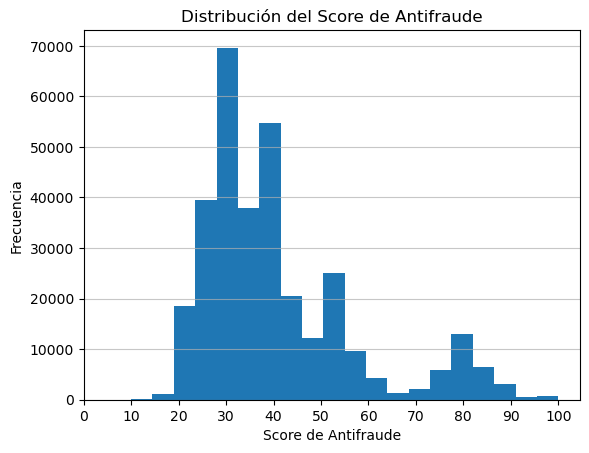

In [51]:
import matplotlib.pyplot as plt
df["antifraud_score"].plot(kind="hist", bins=20)
plt.title("Distribución del Score de Antifraude")
# Personalizar el eje x con incrementos de 5
plt.xticks(range(0, 101, 10))  # Desde 0 hasta 100, de 5 en 5

# Añadir títulos y estilo
plt.title("Distribución del Score de Antifraude")
plt.xlabel("Score de Antifraude")
plt.ylabel("Frecuencia")
plt.grid(axis="y", linestyle="-", alpha=0.7)

plt.show()